In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
path_to_true_values = "results_for_final_presentation/DEHAZENET_webcamId_1066_output_true_values.npy"
path_to_predicted_values = "results_for_final_presentation/DEHAZENET_webcamId_1066_output_predicted_values.npy"

Confusion matrix, without normalization
[[3000    0    0    0   96]
 [   0    0    0    0  166]
 [   0    0    0    0  157]
 [   0    0    0    0  123]
 [   0    0    0    0 3058]]
Normalized confusion matrix
[[0.97 0.   0.   0.   0.03]
 [0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   1.  ]]


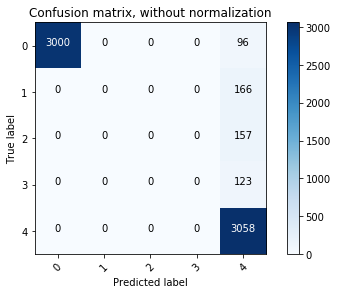

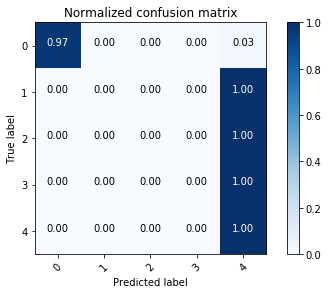

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_test = np.load(path_to_true_values)
y_pred = np.load(path_to_predicted_values)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
